In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import matplotlib.pyplot as mpl
import math
from scipy.stats import pearsonr, spearmanr, chi2_contingency, ttest_ind, mannwhitneyu, norm, normaltest, shapiro, anderson
import operator
from IPython.display import HTML, display
import seaborn as sns
import sklearn
from sklearn import preprocessing, tree
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix, classification_report
from scipy import cluster
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [8]:
demographic_columns = [
    'Age', 
    'Gender', 
    'Education', 
    'Country',
    'Ethnicity',
]

personality_columns = [
    'Neuroticism',
    'Extraversion',
    'Openness to experience',
    'Agreeableness',
    'Conscientiousness',
    'Impulsiveness',
    'Sensation seeking'
]

feature_columns = demographic_columns + personality_columns

drugs_columns = [
    'Alcohol consumption',
    'Amphetamines consumption',
    'Amyl nitrite consumption',
    'Benzodiazepine consumption',
    'Caffeine consumption',
    'Cannabis consumption',
    'Chocolate consumption',
    'Cocaine consumption',
    'Crack consumption',
    'Ecstasy consumption',
    'Heroin consumption',
    'Ketamine consumption',
    'Legal highs consumption',
    'Lysergic acid diethylamide consumption',
    'Methadone consumption',
    'Magic mushrooms consumption',
    'Nicotine consumption',
    'Fictitious drug Semeron consumption',
    'Volatile substance abuse consumption'
]

drugs_legal = ['Alcohol consumption', 'Caffeine consumption', 'Chocolate consumption', 'Nicotine consumption']

drugs_illegal = [drug for drug in drugs_columns if drug not in drugs_legal]

all_columns = feature_columns + drugs_columns

In [9]:
dataset = pd.read_csv("D:/MASTER/MASINSKO UCENJE/I projekat/Data set/drug_consumption.data", names=["ID"] + all_columns)

In [10]:
dataset = dataset.set_index("ID")

# Demographic data analysis

In [11]:
#kopije dataseta za kasnije korišćenje

In [12]:
copy_df = dataset.copy()  

In [13]:
dataset1 = pd.read_csv("D:/MASTER/MASINSKO UCENJE/I projekat/Data set/drug_consumption.data", names=["ID"] + all_columns)

In [14]:
dataset1 = dataset1.set_index("ID")

In [15]:
dataset.head()

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness to experience,Agreeableness,Conscientiousness,...,Ecstasy consumption,Heroin consumption,Ketamine consumption,Legal highs consumption,Lysergic acid diethylamide consumption,Methadone consumption,Magic mushrooms consumption,Nicotine consumption,Fictitious drug Semeron consumption,Volatile substance abuse consumption
ID,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [16]:
dataset.tail()

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness to experience,Agreeableness,Conscientiousness,...,Ecstasy consumption,Heroin consumption,Ketamine consumption,Legal highs consumption,Lysergic acid diethylamide consumption,Methadone consumption,Magic mushrooms consumption,Nicotine consumption,Fictitious drug Semeron consumption,Volatile substance abuse consumption
ID,,,,,,,,,,,,,,,,,,,,,
1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0
1888,-0.95197,-0.48246,-0.61113,0.21128,-0.31685,-0.46725,2.12700,1.65653,1.11406,0.41594,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL6,CL0,CL2


In [17]:
dataset.dtypes

Age                                       float64
Gender                                    float64
Education                                 float64
Country                                   float64
Ethnicity                                 float64
Neuroticism                               float64
Extraversion                              float64
Openness to experience                    float64
Agreeableness                             float64
Conscientiousness                         float64
Impulsiveness                             float64
Sensation seeking                         float64
Alcohol consumption                        object
Amphetamines consumption                   object
Amyl nitrite consumption                   object
Benzodiazepine consumption                 object
Caffeine consumption                       object
Cannabis consumption                       object
Chocolate consumption                      object
Cocaine consumption                        object


In [18]:
dataset.shape

(1885, 31)

In [19]:
dataset.isna().sum()

Age                                       0
Gender                                    0
Education                                 0
Country                                   0
Ethnicity                                 0
Neuroticism                               0
Extraversion                              0
Openness to experience                    0
Agreeableness                             0
Conscientiousness                         0
Impulsiveness                             0
Sensation seeking                         0
Alcohol consumption                       0
Amphetamines consumption                  0
Amyl nitrite consumption                  0
Benzodiazepine consumption                0
Caffeine consumption                      0
Cannabis consumption                      0
Chocolate consumption                     0
Cocaine consumption                       0
Crack consumption                         0
Ecstasy consumption                       0
Heroin consumption              

In [20]:
dataset.isnull().values.any()

False

In [21]:
dataset.describe()

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness to experience,Agreeableness,Conscientiousness,Impulsiveness,Sensation seeking
count,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [22]:
demo_data = dataset.copy()

In [23]:
#transformisanje podataka zbog lakseg citanja grafikona

In [24]:
age = ['18-24' if a <= -0.9 else 
       '25-34' if a >= -0.5 and a < 0 else 
       '35-44' if a > 0 and a < 1 else 
       '45-54' if a > 1 and a < 1.5 else 
       '55-64' if a > 1.5 and a < 2 else 
       '65+' 
       for a in demo_data['Age']]

gender = ['Female' if g > 0 else "Male" for g in demo_data['Gender']]

education = ['Left school before 16 years' if e <-2 else 
             'Left school at 16 years' if e > -2 and e < -1.5 else 
             'Left school at 17 years' if e > -1.5 and e < -1.4 else 
             'Left school at 18 years' if e > -1.4 and e < -1 else 
             'Some college or university, no certificate or degree' if e > -1 and e < -0.5 else 
             'Professional certificate/ diploma' if e > -0.5 and e < 0 else 
             'University degree' if e > 0 and e < 0.5 else 
             'Masters degree' if e > 0.5 and e < 1.5 else 
             'Doctorate degree' 
             for e in demo_data['Education']]

country = ['USA' if c < -0.5 else 
           'New Zealand' if c > -0.5 and c < -0.4 else 
           'Other' if c > -0.4 and c < -0.2 else 
           'Australia' if c > -0.2 and c < 0 else 
           'Ireland' if c > 0 and c < 0.23 else 
           'Canada' if c > 0.23 and c < 0.9 else 
           'UK' 
           for c in demo_data['Country']]

ethnicity = ['Black' if e < -1 else 
             'Asian' if e > -1 and e < -0.4 else 
             'White' if e > -0.4 and e < -0.25 else 
             'Mixed-White/Black' if e >= -0.25 and e < 0.11 else 
             'Mixed-White/Asian' if e > 0.12 and e < 1 else 
             'Mixed-Black/Asian' if e > 1.9 else 
             'Other' 
             for e in demo_data['Ethnicity']]


demo_data['Age'] = age
demo_data['Gender'] = gender
demo_data['Education'] = education
demo_data['Country'] = country
demo_data['Ethnicity'] = ethnicity

In [25]:
demo_data[demographic_columns].head()

,Age,Gender,Education,Country,Ethnicity
ID,,,,,
1,35-44,Female,Professional certificate/ diploma,UK,Mixed-White/Asian
2,25-34,Male,Doctorate degree,UK,White
3,35-44,Male,Professional certificate/ diploma,UK,White
4,18-24,Female,Masters degree,UK,White
5,35-44,Female,Doctorate degree,UK,White


In [26]:
demo_data[demographic_columns].tail()

,Age,Gender,Education,Country,Ethnicity
ID,,,,,
1884,18-24,Female,"Some college or university, no certificate or ...",USA,White
1885,18-24,Male,"Some college or university, no certificate or ...",USA,White
1886,25-34,Female,University degree,USA,White
1887,18-24,Female,"Some college or university, no certificate or ...",USA,White
1888,18-24,Male,"Some college or university, no certificate or ...",Ireland,White


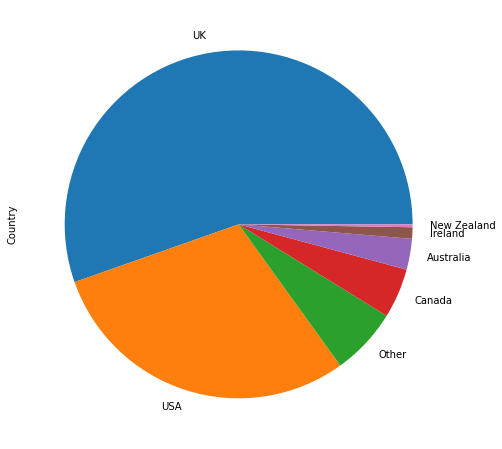

In [27]:
countries = demo_data['Country'].value_counts().plot(kind='pie', figsize=(8, 8))

In [28]:
demo_data['Country'].value_counts()

UK             1044
USA             557
Other           118
Canada           87
Australia        54
Ireland          20
New Zealand       5
Name: Country, dtype: int64

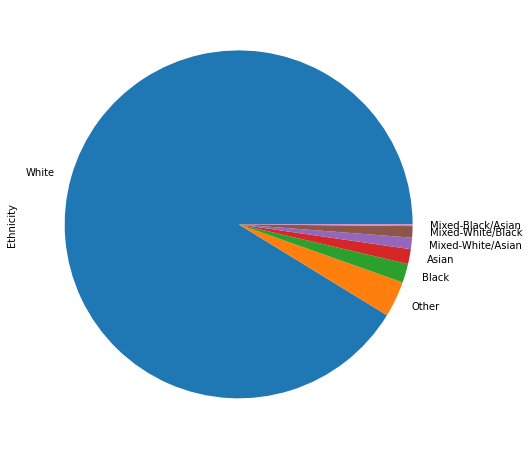

In [29]:
ethnicity = demo_data['Ethnicity'].value_counts().plot(kind='pie', figsize=(8, 8))

In [30]:
demo_data['Ethnicity'].value_counts()

White                1720
Other                  63
Black                  33
Asian                  26
Mixed-White/Asian      20
Mixed-White/Black      20
Mixed-Black/Asian       3
Name: Ethnicity, dtype: int64

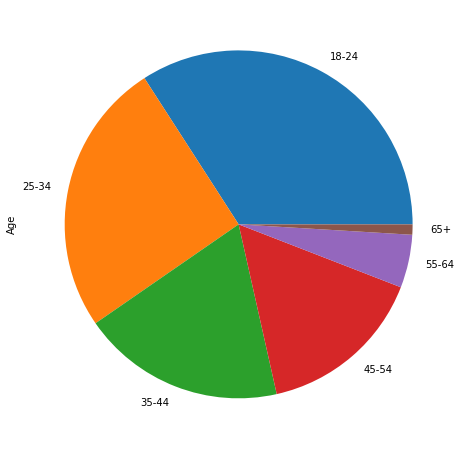

In [31]:
age = demo_data['Age'].value_counts().plot(kind='pie', figsize=(8, 8))

In [32]:
demo_data['Age'].value_counts()

18-24    643
25-34    481
35-44    356
45-54    294
55-64     93
65+       18
Name: Age, dtype: int64

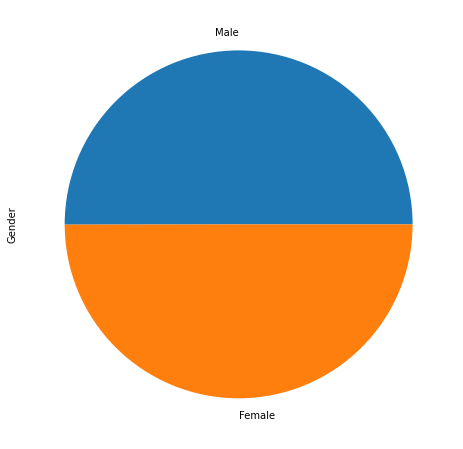

In [33]:
gender = demo_data['Gender'].value_counts().plot(kind='pie', figsize=(8, 8))

In [34]:
demo_data['Gender'].value_counts()

Male      943
Female    942
Name: Gender, dtype: int64

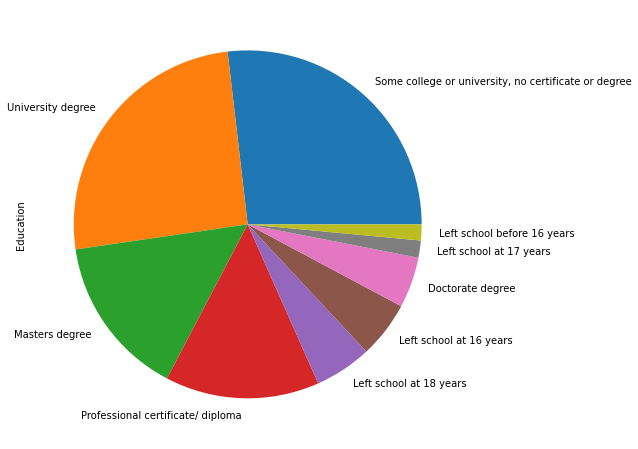

In [35]:
education = demo_data['Education'].value_counts().plot(kind='pie', figsize=(8,8))

In [36]:
demo_data['Education'].value_counts()

Some college or university, no certificate or degree    506
University degree                                       480
Masters degree                                          283
Professional certificate/ diploma                       270
Left school at 18 years                                 100
Left school at 16 years                                  99
Doctorate degree                                         89
Left school at 17 years                                  30
Left school before 16 years                              28
Name: Education, dtype: int64

In [37]:
pd.crosstab(demo_data['Age'], [demo_data['Gender'], demo_data['Country']])

Gender     Female                                                 Male         \
Country Australia Canada Ireland New Zealand Other   UK  USA Australia Canada   
Age                                                                             
18-24           1      7       3           0    12  112  102        21     25   
25-34          11      9       2           1    13  200   58         5      8   
35-44           4      8       3           0     7  150   30         3      7   
45-54           5      7       1           0     4  127   14         3      4   
55-64           0      7       0           0     0   29    7         1      1   
65+             0      3       0           0     0    5    0         0      1   

Gender                                       
Country Ireland New Zealand Other   UK  USA  
Age                                          
18-24         5           2    39   91  223  
25-34         3           2    26   80   63  
35-44         0           0    10  108   26  
45-54         3           0     5   99   22  
55-64         0           0     2   36   10  
65+           0           0     0    7    2

In [38]:
#New Zeland nema nikog testiranog iznad 34 god., i samo jedna zena

#Ireland nema nikog testiranog iznad 54 god.,, i mena muskaraca u grupi 35-44

#Australia nema nikog iznad 65 god.

#Canada ima 3x vise muskaraca u grupi 18-24, i samo 2 muskaraca iznad 54

#UK ima duplo vise zena u grupi 25-34

#Usa ima duplo vise muskaraca u grupi 18-24, i nema zena iznad 64


In [39]:
def value_counts_percentage(dataset, column):
    ''' value.counts() method extended by displaying percentage '''
    
    a = dataset[column].value_counts()
    b = dataset[column].value_counts(normalize=True) * 100
    
    return pd.concat([a,b.round(2)], axis=1, keys=['N', '%'])

In [40]:
value_counts_percentage(demo_data, 'Age')

,N,%
18-24,643,34.11
25-34,481,25.52
35-44,356,18.89
45-54,294,15.60
55-64,93,4.93
65+,18,0.95


In [41]:
pd.concat([value_counts_percentage(demo_data[(demo_data['Ethnicity'] == 'White') & (demo_data['Gender'] == 'Male')], 'Education'),
           value_counts_percentage(demo_data[(demo_data['Ethnicity'] == 'White') & (demo_data['Gender'] == 'Female')], 'Education')],
           axis = 1, keys=['Male', 'Female'])

Male        Female       
                                                      N      %      N      %
Some college or university, no certificate or d...  310  35.92    153  17.85
University degree                                   171  19.81    265  30.92
Professional certificate/ diploma                   120  13.90    130  15.17
Masters degree                                       93  10.78    156  18.20
Left school at 18 years                              56   6.49     35   4.08
Left school at 16 years                              54   6.26     41   4.78
Doctorate degree                                     29   3.36     52   6.07
Left school before 16 years                          16   1.85     12   1.40
Left school at 17 years                              14   1.62     13   1.52

In [42]:
def catplot(data, x, hue, col, rotate_label=True, palette="ch:.25"):
    plot = sns.catplot(x=x, hue=hue, col=col, palette=palette, data=data.sort_values(by=[x]), kind="count")

    if rotate_label:
        for axes in plot.axes.flat:
            _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=40, ha="right")

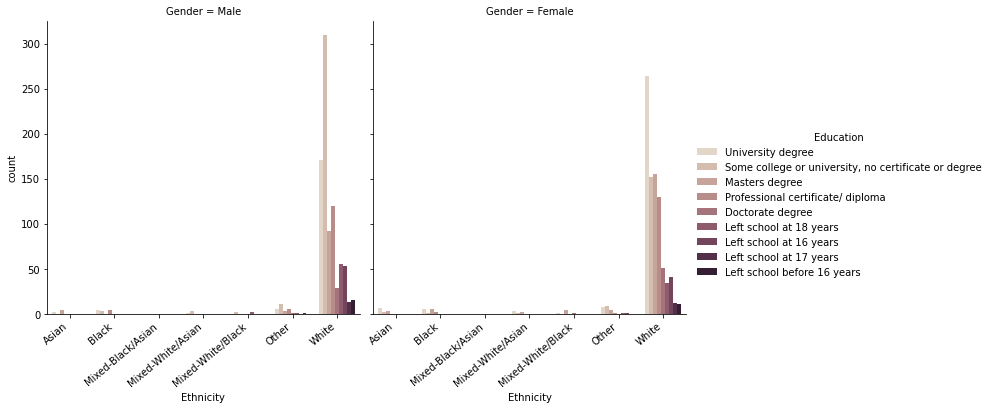

In [43]:
catplot(demo_data, 'Ethnicity', 'Education', 'Gender')

In [44]:
demo_data.mode()

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness to experience,Agreeableness,Conscientiousness,...,Ecstasy consumption,Heroin consumption,Ketamine consumption,Legal highs consumption,Lysergic acid diethylamide consumption,Methadone consumption,Magic mushrooms consumption,Nicotine consumption,Fictitious drug Semeron consumption,Volatile substance abuse consumption
0,18-24,Male,"Some college or university, no certificate or ...",UK,White,-0.46725,0.00332,-0.01928,0.13136,0.58489,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [45]:
demo_data.max()

Age                                                     65+
Gender                                                 Male
Education                                 University degree
Country                                                 USA
Ethnicity                                             White
Neuroticism                                         3.27393
Extraversion                                        3.27393
Openness to experience                              2.90161
Agreeableness                                       3.46436
Conscientiousness                                   3.46436
Impulsiveness                                       2.90161
Sensation seeking                                   1.92173
Alcohol consumption                                     CL6
Amphetamines consumption                                CL6
Amyl nitrite consumption                                CL6
Benzodiazepine consumption                              CL6
Caffeine consumption                    

<AxesSubplot:>

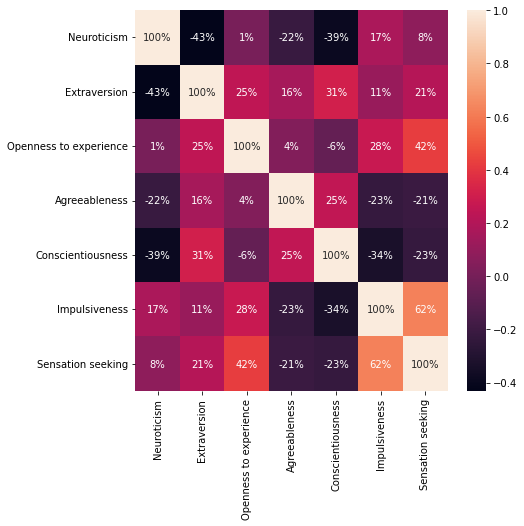

In [46]:
mpl.figure(figsize=(7,7))
sns.heatmap(demo_data.corr(), annot=True, fmt='.0%')

# Drug consumption analysis



CL0 - Never Used

CL1 - Used over a Decade Ago

CL2 - Used in the Last Decade

CL3 - Used in the Last Year

CL4 - Used in the Last Month

CL5 - Used in the Last Week

CL6 - Used in the Last Day

In [47]:
drug_data = dataset[drugs_columns]

In [48]:
drug_data.head()

,Alcohol consumption,Amphetamines consumption,Amyl nitrite consumption,Benzodiazepine consumption,Caffeine consumption,Cannabis consumption,Chocolate consumption,Cocaine consumption,Crack consumption,Ecstasy consumption,Heroin consumption,Ketamine consumption,Legal highs consumption,Lysergic acid diethylamide consumption,Methadone consumption,Magic mushrooms consumption,Nicotine consumption,Fictitious drug Semeron consumption,Volatile substance abuse consumption
ID,,,,,,,,,,,,,,,,,,,
1,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [49]:
drug_data.describe()

,Alcohol consumption,Amphetamines consumption,Amyl nitrite consumption,Benzodiazepine consumption,Caffeine consumption,Cannabis consumption,Chocolate consumption,Cocaine consumption,Crack consumption,Ecstasy consumption,Heroin consumption,Ketamine consumption,Legal highs consumption,Lysergic acid diethylamide consumption,Methadone consumption,Magic mushrooms consumption,Nicotine consumption,Fictitious drug Semeron consumption,Volatile substance abuse consumption
count,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885
unique,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,5,7
top,CL5,CL0,CL0,CL0,CL6,CL6,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
freq,759,976,1305,1000,1385,463,807,1038,1627,1021,1605,1490,1094,1069,1429,982,610,1877,1455


In [50]:
counts = []
proportions = []
for drug in drugs_columns:
    counts.append(drug_data[drug].value_counts())
    proportions.append(drug_data[drug].value_counts(normalize=True))

drug_table_count = pd.concat(counts, axis=1, 
          keys=drugs_columns, sort=True)
drug_table_prop = (pd.concat(proportions, axis=1, 
          keys=drugs_columns, sort=True) * 100).round(2)
drug_table = pd.concat([drug_table_count.T, drug_table_prop.T], keys=['N', '%'], axis=1)

drug_table

N                              \
                                           CL0    CL1    CL2    CL3    CL4   
Alcohol consumption                       34.0   34.0   68.0  198.0  287.0   
Amphetamines consumption                 976.0  230.0  243.0  198.0   75.0   
Amyl nitrite consumption                1305.0  210.0  237.0   92.0   24.0   
Benzodiazepine consumption              1000.0  116.0  234.0  236.0  120.0   
Caffeine consumption                      27.0   10.0   24.0   60.0  106.0   
Cannabis consumption                     413.0  207.0  266.0  211.0  140.0   
Chocolate consumption                     32.0    3.0   10.0   54.0  296.0   
Cocaine consumption                     1038.0  160.0  270.0  258.0   99.0   
Crack consumption                       1627.0   67.0  112.0   59.0    9.0   
Ecstasy consumption                     1021.0  113.0  234.0  277.0  156.0   
Heroin consumption                      1605.0   68.0   94.0   65.0   24.0   
Ketamine consumption                    1490.0   45.0  142.0  129.0   42.0   
Legal highs consumption                 1094.0   29.0  198.0  323.0  110.0   
Lysergic acid diethylamide consumption  1069.0  259.0  177.0  214.0   97.0   
Methadone consumption                   1429.0   39.0   97.0  149.0   50.0   
Magic mushrooms consumption              982.0  209.0  260.0  275.0  115.0   
Nicotine consumption                     428.0  193.0  204.0  185.0  108.0   
Fictitious drug Semeron consumption     1877.0    2.0    3.0    2.0    1.0   
Volatile substance abuse consumption    1455.0  200.0  135.0   61.0   13.0   

                                                           %                \
                                          CL5     CL6    CL0    CL1    CL2   
Alcohol consumption                     759.0   505.0   1.80   1.80   3.61   
Amphetamines consumption                 61.0   102.0  51.78  12.20  12.89   
Amyl nitrite consumption                 14.0     3.0  69.23  11.14  12.57   
Benzodiazepine consumption               84.0    95.0  53.05   6.15  12.41   
Caffeine consumption                    273.0  1385.0   1.43   0.53   1.27   
Cannabis consumption                    185.0   463.0  21.91  10.98  14.11   
Chocolate consumption                   683.0   807.0   1.70   0.16   0.53   
Cocaine consumption                      41.0    19.0  55.07   8.49  14.32   
Crack consumption                         9.0     2.0  86.31   3.55   5.94   
Ecstasy consumption                      63.0    21.0  54.16   5.99  12.41   
Heroin consumption                       16.0    13.0  85.15   3.61   4.99   
Ketamine consumption                     33.0     4.0  79.05   2.39   7.53   
Legal highs consumption                  64.0    67.0  58.04   1.54  10.50   
Lysergic acid diethylamide consumption   56.0    13.0  56.71  13.74   9.39   
Methadone consumption                    48.0    73.0  75.81   2.07   5.15   
Magic mushrooms consumption              40.0     4.0  52.10  11.09  13.79   
Nicotine consumption                    157.0   610.0  22.71  10.24  10.82   
Fictitious drug Semeron consumption       NaN     NaN  99.58   0.11   0.16   
Volatile substance abuse consumption     14.0     7.0  77.19  10.61   7.16   

                                                                    
                                          CL3    CL4    CL5    CL6  
Alcohol consumption                     10.50  15.23  40.27  26.79  
Amphetamines consumption                10.50   3.98   3.24   5.41  
Amyl nitrite consumption                 4.88   1.27   0.74   0.16  
Benzodiazepine consumption              12.52   6.37   4.46   5.04  
Caffeine consumption                     3.18   5.62  14.48  73.47  
Cannabis consumption                    11.19   7.43   9.81  24.56  
Chocolate consumption                    2.86  15.70  36.23  42.81  
Cocaine consumption                     13.69   5.25   2.18   1.01  
Crack consumption                        3.13   0.48   0.48   0.11  
Ecstasy 

In [51]:
drug_data.keys()

Index(['Alcohol consumption', 'Amphetamines consumption',
       'Amyl nitrite consumption', 'Benzodiazepine consumption',
       'Caffeine consumption', 'Cannabis consumption', 'Chocolate consumption',
       'Cocaine consumption', 'Crack consumption', 'Ecstasy consumption',
       'Heroin consumption', 'Ketamine consumption', 'Legal highs consumption',
       'Lysergic acid diethylamide consumption', 'Methadone consumption',
       'Magic mushrooms consumption', 'Nicotine consumption',
       'Fictitious drug Semeron consumption',
       'Volatile substance abuse consumption'],
      dtype='object')

In [52]:
columns=['Alcohol consumption', 'Amphetamines consumption',
       'Amyl nitrite consumption', 'Benzodiazepine consumption',
       'Caffeine consumption', 'Cannabis consumption', 'Chocolate consumption',
       'Cocaine consumption', 'Crack consumption', 'Ecstasy consumption',
       'Heroin consumption', 'Ketamine consumption', 'Legal highs consumption',
       'Lysergic acid diethylamide consumption', 'Methadone consumption',
       'Magic mushrooms consumption', 'Nicotine consumption',
       'Fictitious drug Semeron consumption',
       'Volatile substance abuse consumption']

In [53]:
cp=['User_Alcohol','User_Amphet', 'User_Amyl', 'User_Benzos', 'User_Caff', 'User_Cannabis', 'User_Choc', 'User_Coke', 'User_Crack',
           'User_Ecstasy', 'User_Heroin', 'User_Ketamine', 'User_Legalh', 'User_LSD', 'User_Meth', 'User_Mushrooms','User_Nicotine', 'User_Semer', 'User_VSA']

Pretvaranje u numericke podatke
CL0 - Never Used = 0

CL1 - Used over a Decade Ago = 1

CL2 - Used in the Last Decade = 2

CL3 - Used in the Last Year =3

CL4 - Used in the Last Month =4

CL5 - Used in the Last Week =5 

CL6 - Used in the Last Day =6

In [56]:
# Encode columns into numeric data
from sklearn.preprocessing import LabelEncoder
for column in columns:
    le = LabelEncoder()
    copy_df[column] = le.fit_transform(copy_df[column])

In [57]:
for i in range(len(columns)):
    copy_df.loc[((copy_df[columns[i]]==0) | (copy_df[columns[i]]==1)),cp[i]] = 'Non-user'
    copy_df.loc[((copy_df[columns[i]]==2) | (copy_df[columns[i]]==3) | (copy_df[columns[i]]==4) | (copy_df[columns[i]]==5) | (copy_df[columns[i]]==6)),cp[i]] = 'User'


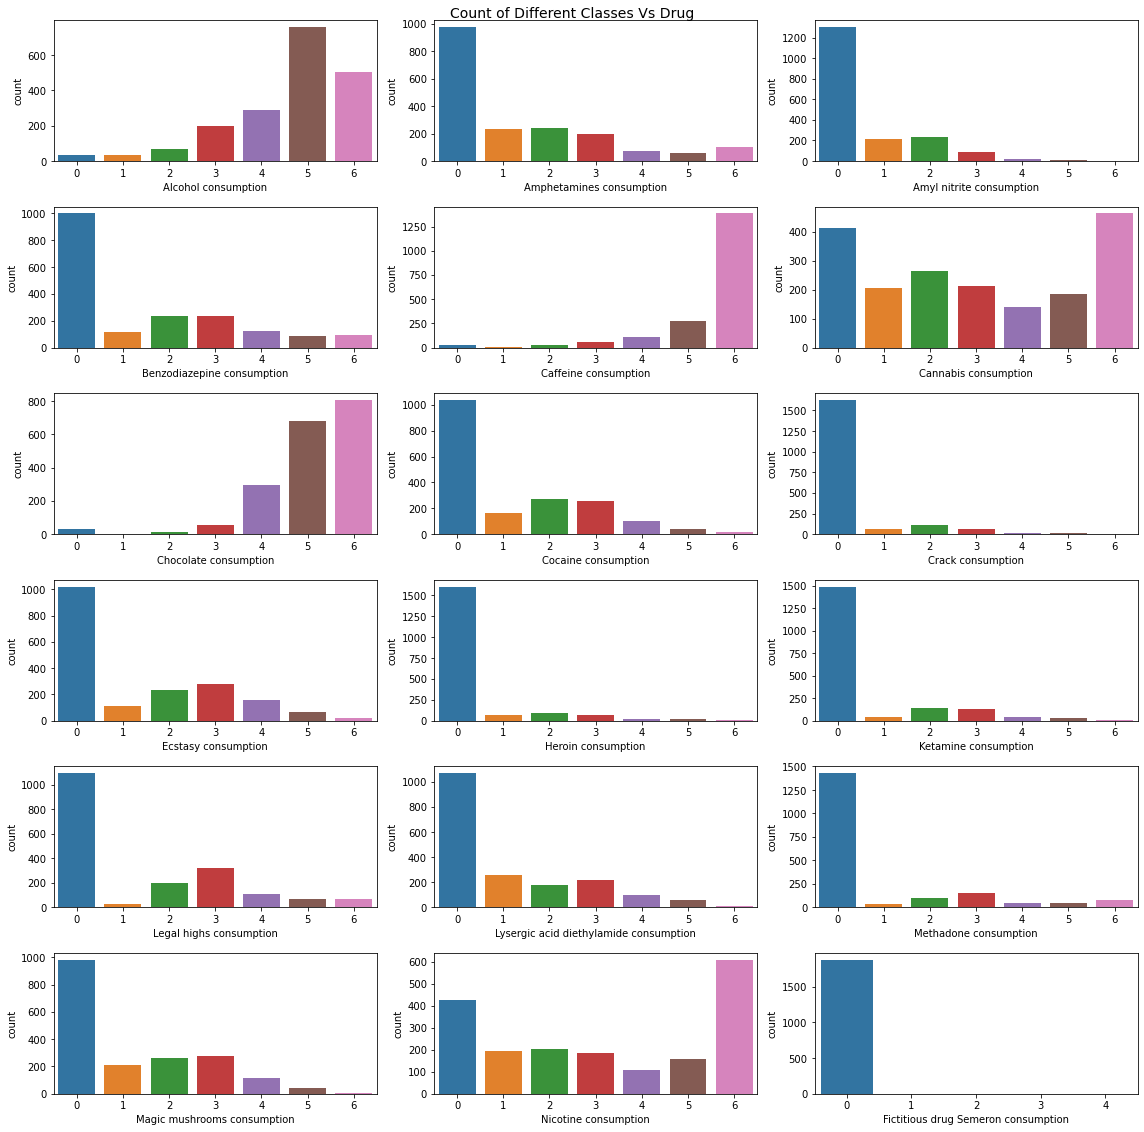

In [58]:
fig, axes = plt.subplots(6,3,figsize = (16,16))
fig.suptitle("Count of Different Classes Vs Drug",fontsize=14)
k=0
for i in range(6):
    for j in range(3):
        sns.countplot(x=columns[k], data=copy_df,ax=axes[i][j])
        k+=1

plt.tight_layout()
plt.show()

In [60]:
mpl.figure(figsize=(12,12))
sns.heatmap(drug_data.corr(), annot=True, fmt='.0%')

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 864x864 with 0 Axes>

Alcohol, caffeine i chocolate nisu u korelaciji ni sa jednom drugom drogom


In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

NameError: name 'X_train' is not defined

In [ ]:
dataset1.replace(["CL0","CL1","CL2","CL3","CL4","CL5","CL6"],[0.0,1.0,2.0,3.0,4.0,5.0,6.0],inplace=True)
dataset1.head()

In [ ]:
feature_names=[ 'Age', 
    'Gender', 
    'Education', 
    'Country',
    'Ethnicity',
'Neuroticism',
    'Extraversion',
    'Openness to experience',
    'Agreeableness',
    'Conscientiousness',
    'Impulsiveness',
    'Sensation seeking',
'Alcohol consumption',
'Caffeine consumption',
'Chocolate consumption',
'Nicotine consumption']

In [ ]:
part_df = pd.DataFrame.copy(dataset1[feature_names])
part_df.head()

In [ ]:
drug_names = ['Amphetamines consumption',
    'Amyl nitrite consumption',
    'Benzodiazepine consumption',
    'Cannabis consumption',
    'Cocaine consumption',
    'Crack consumption',
    'Ecstasy consumption',
    'Heroin consumption',
    'Ketamine consumption',
    'Legal highs consumption',
    'Lysergic acid diethylamide consumption',
    'Methadone consumption',
    'Magic mushrooms consumption',
    'Fictitious drug Semeron consumption',
    'Volatile substance abuse consumption']

In [ ]:
part_df["WillUse"] = int(0)

In [ ]:
for i in dataset1.index.values:
    count = -1
    while count < 14:
        count += 1
        # print('i is ', i, 'count is ', count)
        # check for illegal drug use within past decade or less
        if dataset1.loc[i, drug_names[count]] > 2.0:
            # set the prediction to 1 = likely to use illegal drugs
            part_df.loc[[i],['WillUse']] = int(1)
            # print ("For i of ", i," target is switched to ", part_df.loc[[i],['WillUse']])
            break

In [ ]:
part_df.describe()

In [ ]:
part_df.info()

In [ ]:
X = np.array(part_df[feature_names])
y = np.array(part_df['WillUse'])

In [ ]:
X_train, X_test = X[:942, ...], X[943:, ...]

y_train = y[:942]
y_test = y[943:]

# Random Forest Decision Tree Classifier

In [ ]:
# Run the Decisiontree classifier on the train data and test the accuracy using the test data.
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

# Check the accuracy 
accuracy = dtc.score(X_test, y_test)
print("Random Forest Accuracy = ",accuracy)

# Print classification report
target_names = ['Unlikely to Use', 'Will Use']
clr = classification_report(y_test, y_pred, target_names=target_names)
print(clr)

In [ ]:
def plot_confusion_matrix(cm, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 15)
    plt.colorbar()    
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=0, size = 12)
    plt.yticks(tick_marks, target_names, rotation=90, size = 12)
    plt.tight_layout()
    plt.ylabel('True Label', size = 15)
    plt.xlabel('Predicted Label', size = 15)
    plt.savefig('plot_confusion_matrix')

In [ ]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix for un-scaled Random Forest')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

In [ ]:
# Normalize the confusion matrix by row (i.e by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized Confusion Matrix for Random Forest')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized Confusion Matrix')
plt.savefig('plot_norm_confusion_matrix')
plt.show()

In [ ]:
# Would it improve the results if I scale X?
Xp = scale(X)

# Split the X array into two, one to train and one to test
Xp_train, Xp_test = Xp[:942, ...], Xp[943:, ...]
y_train = y[:942]
y_test = y[943:]

# Run the Decisiontree classifier on the train data and test the accuracy on the test data.
dtcX = tree.DecisionTreeClassifier()
dtcX.fit(Xp_train, y_train)
y_pred = dtcX.predict(Xp_test)

# Check the accuracy 
accuracy = dtc.score(Xp_test, y_test)
print("Scaled Random Forest Accuracy = ",accuracy)

# Print classification report 
clr = classification_report(y_test, y_pred, target_names=target_names)
print(clr)

In [ ]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized Confusion Matrix for Scaled Random Forest')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized Confusion Matrix')
plt.savefig('plot_norm_confusion_matrix')
plt.show()

# Gaussian Naive Bayes Classifier

In [ ]:
# To try a Naive Bayes model, need to verify the train and test arrays are the same length
print(X_train.shape, y_train.shape)

# Run a Gaussian Naive Bayes model
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

# Print classification report 
clr = classification_report(y_test, y_pred, target_names=target_names)
print(clr)

In [ ]:
# Plot the normalized confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized Confusion Matrix for Naive Bayes')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized Confusion Matrix for Naive Bayes')
plt.savefig('plot_norm_confusion_matrix')
plt.show()

So, judging from the f1 score, the Naive Bayes is better than the RandomForest, but maybe I can do better still

# K-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(Xp_train, y_train)
y_pred = knn.predict(Xp_test)

# Print classification report 
clr = classification_report(y_test, y_pred, target_names=target_names)
print(clr)

In [ ]:
# Plot the normalized confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized Confusion Matrix for K-Nearest Neighbor')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized Confusion Matrix for K-Nearest Neighbor')
plt.savefig('plot_norm_confusion_matrix')
plt.show()

Iz dobijenih rezultata treniranja modela možemo zaključiti da je Gaussian Naive Bayes Classifier najbolji model za predviđanje naših rezultata.